In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/content/data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [4]:
data.drop(['Date'], axis=1, inplace=True)

In [5]:
print(data.head())
print(data.shape)
print(data.columns)

        Open       High        Low      Close  Adj Close    Volume
0  50.050049  52.082081  48.028027  50.220219  50.220219  44659096
1  50.555557  54.594597  50.300301  54.209209  54.209209  22834343
2  55.430431  56.796799  54.579578  54.754753  54.754753  18256126
3  55.675674  55.855858  51.836838  52.487488  52.487488  15247337
4  52.532532  54.054054  51.991993  53.053055  53.053055   9188602
(4431, 6)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


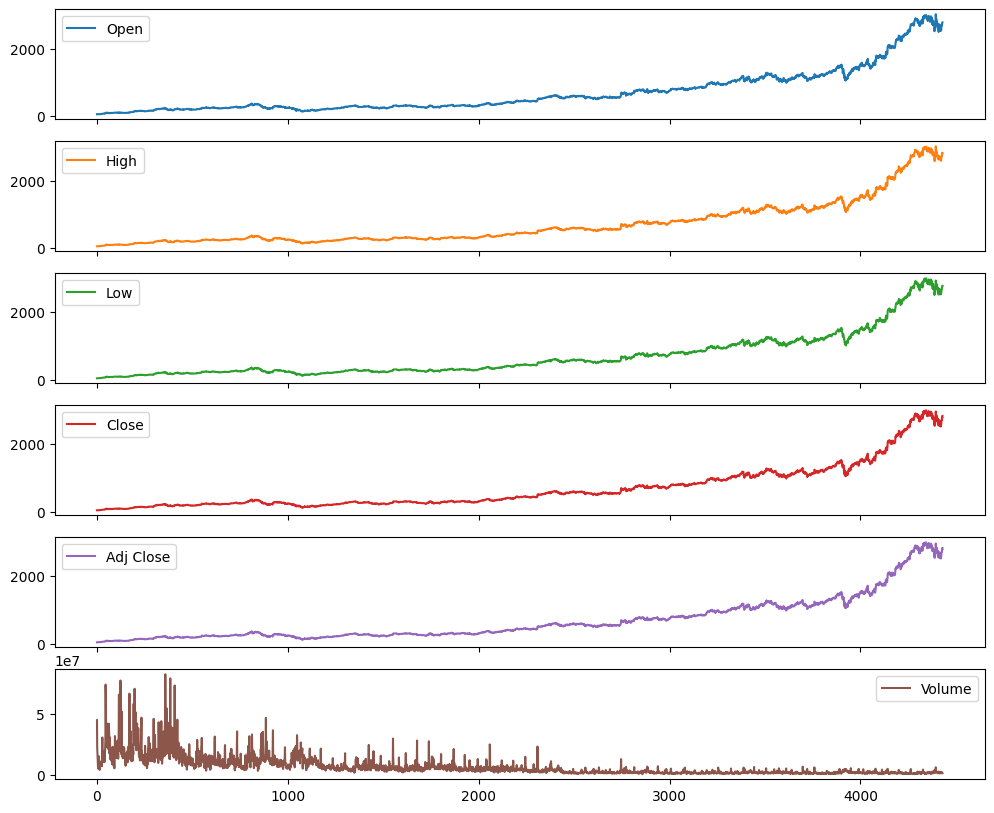

,0
Open,4314
High,4282
Low,4323
Close,4352
Adj Close,4352
Volume,4317


In [6]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [7]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Open,High,Low,Close,Adj Close,Volume
0,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


             Open         High          Low        Close    Adj Close  \
0       50.050049    52.082081    48.028027    50.220219    50.220219   
1       50.555557    54.594597    50.300301    54.209209    54.209209   
2       55.430431    56.796799    54.579578    54.754753    54.754753   
3       55.675674    55.855858    51.836838    52.487488    52.487488   
4       52.532532    54.054054    51.991993    53.053055    53.053055   
...           ...          ...          ...          ...          ...   
4426  2668.489990  2724.879883  2645.169922  2722.510010  2722.510010   
4427  2723.270020  2741.000000  2681.850098  2722.030029  2722.030029   
4428  2722.030029  2821.000000  2722.030029  2797.360107  2797.360107   
4429  2774.050049  2791.770020  2756.699951  2765.510010  2765.510010   
4430  2784.000000  2832.379883  2755.010010  2831.439941  2831.439941   

        Volume  
0     44659096  
1     22834343  
2     18256126  
3     15247337  
4      9188602  
...        ...  
4426

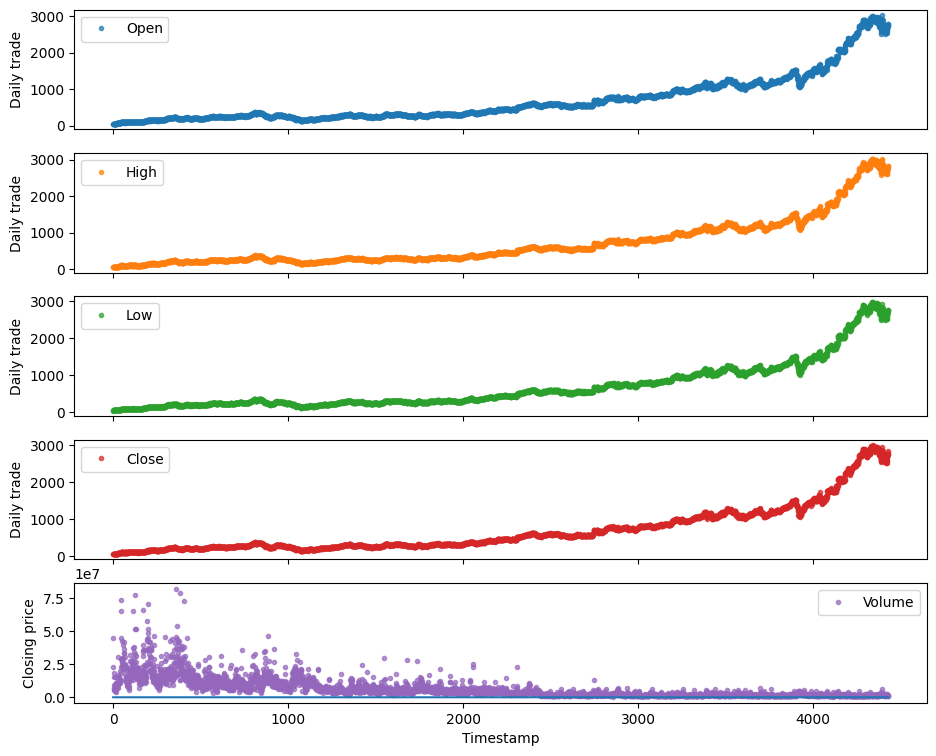

In [8]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [9]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


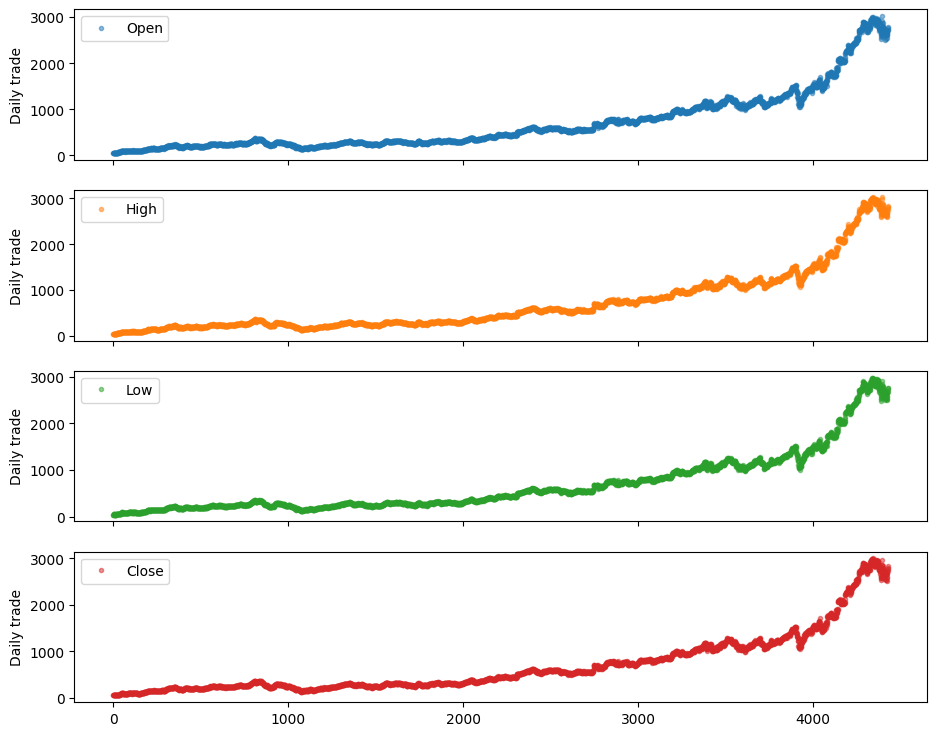

In [10]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

             Open         High          Low        Close    Adj Close  \
0       50.050049    52.082081    48.028027    50.220219    50.220219   
1       50.555557    54.594597    50.300301    54.209209    54.209209   
2       55.430431    56.796799    54.579578    54.754753    54.754753   
3       55.675674    55.855858    51.836838    52.487488    52.487488   
4       52.532532    54.054054    51.991993    53.053055    53.053055   
...           ...          ...          ...          ...          ...   
4426  2668.489990  2724.879883  2645.169922  2722.510010  2722.510010   
4427  2723.270020  2741.000000  2681.850098  2722.030029  2722.030029   
4428  2722.030029  2821.000000  2722.030029  2797.360107  2797.360107   
4429  2774.050049  2791.770020  2756.699951  2765.510010  2765.510010   
4430  2784.000000  2832.379883  2755.010010  2831.439941  2831.439941   

        Volume  
0     44659096  
1     22834343  
2     18256126  
3     15247337  
4      9188602  
...        ...  
4426

,count,mean,std,min,25%,50%,75%,max
Open,4431.0,6.930873e+02,6.451188e+02,49.644646,2.485586e+02,4.349249e+02,1.007365e+03,3.025000e+03
High,4431.0,6.997356e+02,6.513312e+02,50.920921,2.508534e+02,4.378879e+02,1.020650e+03,3.030930e+03
Low,4431.0,6.860788e+02,6.385795e+02,48.028027,2.458133e+02,4.326877e+02,9.972750e+02,2.977980e+03
Close,4431.0,6.930974e+02,6.451878e+02,50.055054,2.484159e+02,4.353303e+02,1.007790e+03,2.996770e+03
Adj Close,4431.0,6.930974e+02,6.451878e+02,50.055054,2.484159e+02,4.353303e+02,1.007790e+03,2.996770e+03
Volume,4431.0,6.444992e+06,7.690351e+06,465600.000000,1.695600e+06,3.778418e+06,8.002390e+06,8.215117e+07


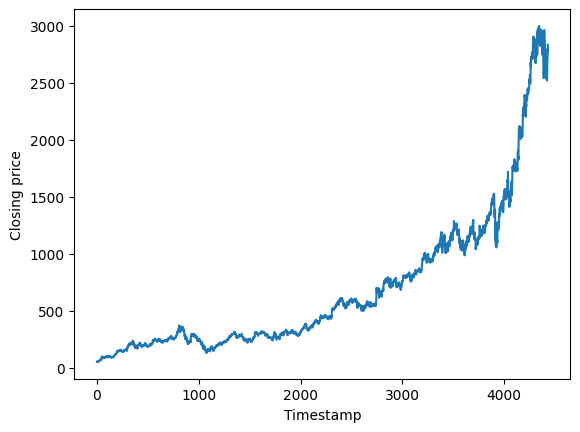

In [11]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [12]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

3463
866


In [13]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0297 - mae: 0.1241 - mse: 0.0297 - val_loss: 0.0038 - val_mae: 0.0464 - val_mse: 0.0038
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mae: 0.0386 - mse: 0.0028 - val_loss: 0.0016 - val_mae: 0.0303 - val_mse: 0.0016
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0298 - mse: 0.0015 - val_loss: 0.0013 - val_mae: 0.0272 - val_mse: 0.0013
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0261 - mse: 0.0012 - val_loss: 0.0011 - val_mae: 0.0248 - val_mse: 0.0011
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4778e-04 - mae: 0.0233 - mse: 9.4778e-04 - val_loss: 0.0011 - val_mae: 0.0257 - val_mse: 0.0011
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.8582e-04 - mae: 0.0225 - mse: 8.8582e-04 - val_loss: 0.0011 - val_mae: 0.0255 - val_mse: 0.0011
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.2973e-04 - mae: 0.0217 - m

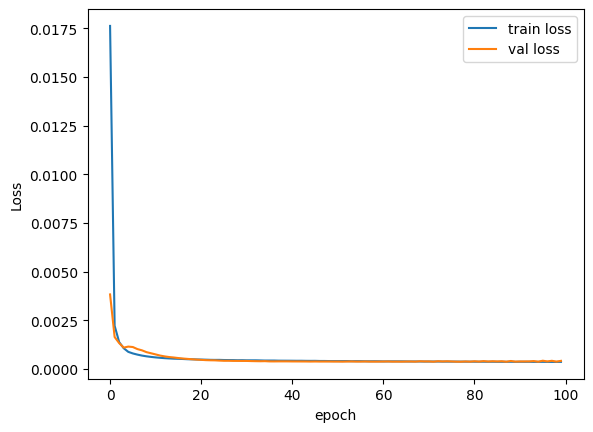

In [14]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

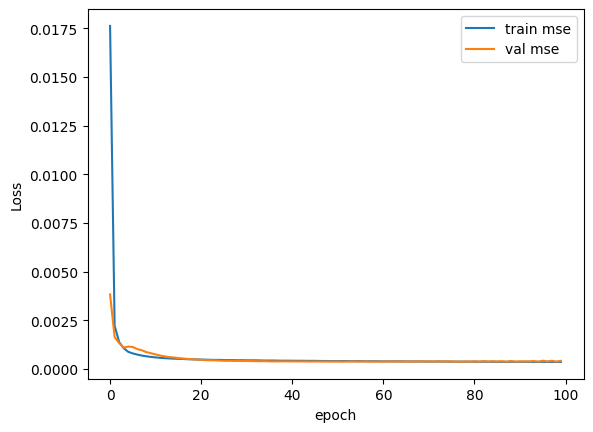

In [15]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

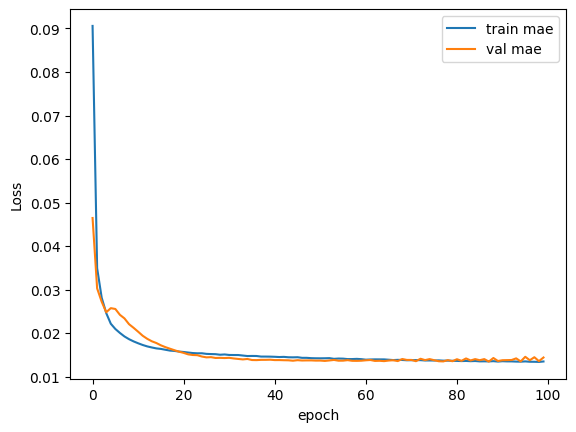

In [16]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 16)          │         7,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,253 (333.02 KB)

 Trainable params: 28,417 (111.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56,836 (222.02 KB)

None


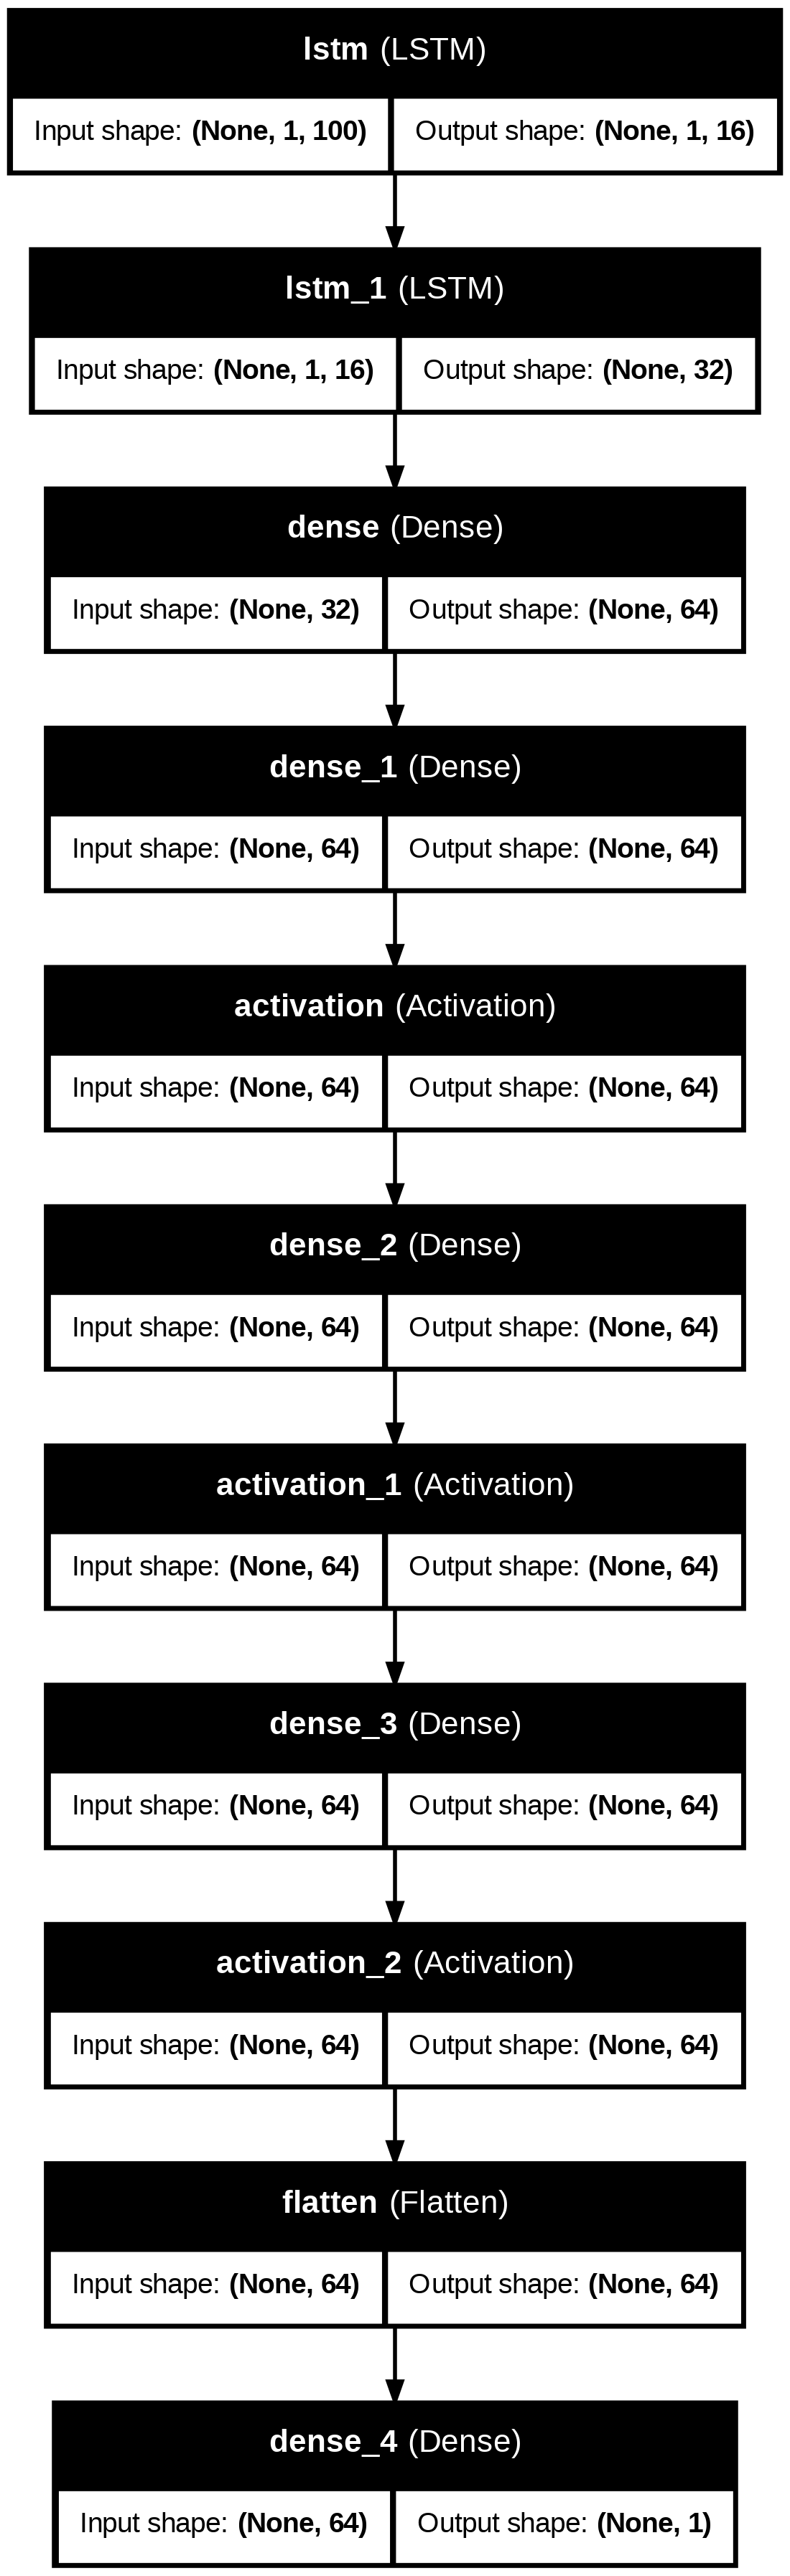

In [17]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [18]:
model.evaluate(test_X, test_Y)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5086e-04 - mae: 0.0138 - mse: 3.5086e-04


[0.00040554325096309185, 0.00040554325096309185, 0.014391669072210789]

In [19]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.988751
R2 Score: 0.988170
Max Error: 0.113590


In [20]:
import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad
import pandas as pd

# Define search space
optimizers = {
    'Adam': Adam,
    'RMSprop': RMSprop,
    'Adagrad': Adagrad
}
learning_rates = [0.001, 0.0001, 0.00001]
batch_sizes = [16, 32, 64]

# Placeholder for results
results = []

# Loop over all combinations
for opt_name, opt_class in optimizers.items():
    for lr in learning_rates:
        for batch in batch_sizes:
            print(f"\n=== Training with {opt_name}, lr={lr}, batch_size={batch} ===")

            # Build model
            model = Sequential([
                LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1], 100)),
                LSTM(32, activation='tanh'),
                Dense(64, activation='relu'),
                Dense(64, activation='relu'),
                Dense(64, activation='relu'),
                Dense(64, activation='relu'),
                Flatten(),
                Dense(1, activation='linear')
            ])

            # Compile model
            optimizer = opt_class(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae'])

            # Train
            history = model.fit(
                train_X, train_Y,
                validation_data=(test_X, test_Y),
                epochs=100,
                batch_size=batch,
                verbose=0,
                shuffle=False
            )

            # Collect final validation metrics
            final_val_mse = history.history['val_mse'][-1]
            final_val_mae = history.history['val_mae'][-1]
            final_train_mse = history.history['mse'][-1]

            results.append({
                'Optimizer': opt_name,
                'Learning Rate': lr,
                'Batch Size': batch,
                'Train MSE': final_train_mse,
                'Val MSE': final_val_mse,
                'Val MAE': final_val_mae
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n=== Ablation Study Results ===")
print(results_df.sort_values(by='Val MSE'))

# Optional: Save to CSV
results_df.to_csv("ablation_results.csv", index=False)



=== Training with Adam, lr=0.001, batch_size=16 ===

=== Training with Adam, lr=0.001, batch_size=32 ===

=== Training with Adam, lr=0.001, batch_size=64 ===

=== Training with Adam, lr=0.0001, batch_size=16 ===

=== Training with Adam, lr=0.0001, batch_size=32 ===

=== Training with Adam, lr=0.0001, batch_size=64 ===

=== Training with Adam, lr=1e-05, batch_size=16 ===

=== Training with Adam, lr=1e-05, batch_size=32 ===

=== Training with Adam, lr=1e-05, batch_size=64 ===

=== Training with RMSprop, lr=0.001, batch_size=16 ===

=== Training with RMSprop, lr=0.001, batch_size=32 ===

=== Training with RMSprop, lr=0.001, batch_size=64 ===

=== Training with RMSprop, lr=0.0001, batch_size=16 ===

=== Training with RMSprop, lr=0.0001, batch_size=32 ===

=== Training with RMSprop, lr=0.0001, batch_size=64 ===

=== Training with RMSprop, lr=1e-05, batch_size=16 ===

=== Training with RMSprop, lr=1e-05, batch_size=32 ===

=== Training with RMSprop, lr=1e-05, batch_size=64 ===

=== Training